<a href="https://colab.research.google.com/github/humbletechy/258_Assignment_2/blob/main/Businesses__258_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import gdown
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
df_business = pd.read_csv('/content/drive/MyDrive/CSE258/CA_businesses.csv')  
df_reviews = pd.read_csv('/content/drive/MyDrive/CSE258/CA_reviews.csv') 
df_tipdata = pd.read_csv('/content/drive/MyDrive/CSE258/CA_tipdata.csv') 
df_userdata = pd.read_csv('/content/drive/MyDrive/CSE258/CA_userdata.csv') 

In [10]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [11]:
df_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [12]:
df_tipdata.columns

Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')

In [13]:
df_userdata.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [14]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101.0,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101.0,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101.0,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103.0,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,Santa Barbara,CA,93101.0,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [15]:
df_business.postal_code.value_counts()

93101.0    1866
93117.0     901
93105.0     770
93103.0     396
93013.0     298
93108.0     258
93111.0     203
93110.0     155
93109.0     153
93190.0      36
93067.0      36
93106.0      22
93102.0      18
93118.0      11
93121.0      11
96161.0      11
93160.0       8
93130.0       6
93120.0       4
93140.0       4
93199.0       3
89523.0       2
93150.0       2
93031.0       2
93107.0       2
83642.0       1
92626.0       1
91306.0       1
96150.0       1
83646.0       1
34609.0       1
94804.0       1
91355.0       1
95050.0       1
93041.0       1
93119.0       1
83616.0       1
90703.0       1
93030.0       1
93014.0       1
33613.0       1
92324.0       1
90041.0       1
93001.0       1
96143.0       1
89431.0       1
91307.0       1
93907.0       1
Name: postal_code, dtype: int64

In [16]:
df_business['is_open'].value_counts()

1    4065
0    1138
Name: is_open, dtype: int64

In [17]:
df_new = df_business[['categories','stars', 'review_count']]
df_new

,categories,stars,review_count
0,"Doctors, Traditional Chinese Medicine, Naturop...",5.0,7
1,"Women's Clothing, Accessories, Children's Clot...",3.0,24
2,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",4.0,389
3,"Towing, Automotive, Body Shops",4.5,32
4,"Parenting Classes, Maternity Wear, Fashion, Ed...",5.0,17
...,...,...,...
5198,"Event Planning & Services, Wine Tasting Room, ...",5.0,19
5199,"Restaurants, Burgers, Food, Ice Cream & Frozen...",2.5,12
5200,"Shopping, Eyewear & Opticians, Health & Medica...",4.5,15
5201,"Restaurants, Pizza, Food",4.0,299


In [18]:
all_categories = defaultdict(int)
category_rating_test = defaultdict(list)
avg_category_rating = defaultdict(int)
num_category_reviews = defaultdict(int)

In [19]:
for idx, row in df_new.iterrows():
  ll = row['categories']
  ll = str(ll)
  if ll and ll!='nan':
    categs = ll.split(',')
    for categ in categs:
      categ = categ.strip()
      all_categories[categ]+=1
      avg_category_rating[categ] += row['stars']
      num_category_reviews[categ] += row['review_count']

In [20]:
for key, value in avg_category_rating.items():
  avg_category_rating[key] /= all_categories[key]

In [21]:
# for key, value in avgnum_category_reviews.items():
#   avgnum_category_reviews[key] /= all_categories[key]

In [22]:
print(dict(list(all_categories.items())[0: 5]))

{'Doctors': 235, 'Traditional Chinese Medicine': 26, 'Naturopathic/Holistic': 30, 'Acupuncture': 29, 'Health & Medical': 592}


In [23]:
print(dict(list(avg_category_rating.items())[0: 5]))

{'Doctors': 3.8106382978723405, 'Traditional Chinese Medicine': 4.846153846153846, 'Naturopathic/Holistic': 4.483333333333333, 'Acupuncture': 4.810344827586207, 'Health & Medical': 4.109797297297297}


In [24]:
print(dict(list(num_category_reviews.items())[0: 5]))

{'Doctors': 4127, 'Traditional Chinese Medicine': 476, 'Naturopathic/Holistic': 537, 'Acupuncture': 680, 'Health & Medical': 12840}


##   Category wise business count

In [25]:
all_categories_sorted = dict(sorted(all_categories.items(), key=lambda x:x[1], reverse = True))
all_categories_sorted

{'Restaurants': 1161,
 'Shopping': 936,
 'Food': 835,
 'Home Services': 638,
 'Health & Medical': 592,
 'Event Planning & Services': 550,
 'Local Services': 510,
 'Beauty & Spas': 510,
 'Active Life': 369,
 'Automotive': 326,
 'Nightlife': 317,
 'Hotels & Travel': 311,
 'Bars': 281,
 'Arts & Entertainment': 254,
 'Professional Services': 254,
 'Fashion': 236,
 'Doctors': 235,
 'Home & Garden': 220,
 'American (New)': 202,
 'Mexican': 189,
 'Coffee & Tea': 184,
 'Hair Salons': 178,
 'Sandwiches': 174,
 'Breakfast & Brunch': 170,
 'Real Estate': 169,
 'Auto Repair': 166,
 'Fitness & Instruction': 163,
 'American (Traditional)': 144,
 'Skin Care': 142,
 'Beer': 126,
 'Wine & Spirits': 126,
 'Specialty Food': 125,
 'Hair Removal': 124,
 'Hotels': 122,
 "Women's Clothing": 119,
 'Dentists': 115,
 'Pets': 114,
 'Pizza': 113,
 'Wedding Planning': 104,
 'Massage': 104,
 'Contractors': 104,
 'Bakeries': 102,
 'Education': 100,
 'Burgers': 100,
 'Accessories': 99,
 'Seafood': 96,
 'Tours': 96,
 

In [26]:
len(all_categories_sorted)

985

In [27]:
all_categ_highest = {key: value for (key, value) in all_categories_sorted.items() if value >= 150 }
all_categ_highest

{'Restaurants': 1161,
 'Shopping': 936,
 'Food': 835,
 'Home Services': 638,
 'Health & Medical': 592,
 'Event Planning & Services': 550,
 'Local Services': 510,
 'Beauty & Spas': 510,
 'Active Life': 369,
 'Automotive': 326,
 'Nightlife': 317,
 'Hotels & Travel': 311,
 'Bars': 281,
 'Arts & Entertainment': 254,
 'Professional Services': 254,
 'Fashion': 236,
 'Doctors': 235,
 'Home & Garden': 220,
 'American (New)': 202,
 'Mexican': 189,
 'Coffee & Tea': 184,
 'Hair Salons': 178,
 'Sandwiches': 174,
 'Breakfast & Brunch': 170,
 'Real Estate': 169,
 'Auto Repair': 166,
 'Fitness & Instruction': 163}

In [28]:
# all_categ_lowest = {key: value for (key, value) in all_categories_sorted.items() if value < 100}
# total_lowest = sum(all_categ_lowest. values())
# total_lowest

In [29]:
# categories = all_categ_highest.copy()
# categories['Others'] = total_lowest
# categories

In [30]:
categories = all_categ_highest

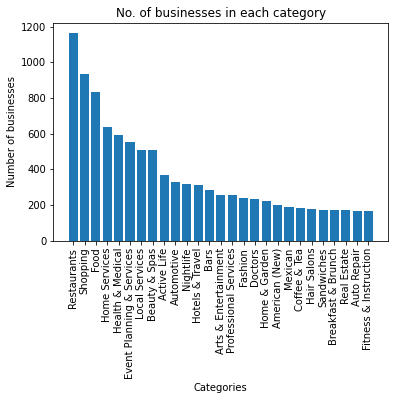

In [31]:
plt.bar(categories.keys(), categories.values())
plt.xticks(rotation = 90)
plt.xlabel('Categories')
plt.ylabel('Number of businesses')
plt.title('No. of businesses in each category')
plt.show()

In [32]:
categories.keys()

dict_keys(['Restaurants', 'Shopping', 'Food', 'Home Services', 'Health & Medical', 'Event Planning & Services', 'Local Services', 'Beauty & Spas', 'Active Life', 'Automotive', 'Nightlife', 'Hotels & Travel', 'Bars', 'Arts & Entertainment', 'Professional Services', 'Fashion', 'Doctors', 'Home & Garden', 'American (New)', 'Mexican', 'Coffee & Tea', 'Hair Salons', 'Sandwiches', 'Breakfast & Brunch', 'Real Estate', 'Auto Repair', 'Fitness & Instruction'])

##   Category wise average rating

In [33]:
dict(sorted(avg_category_rating.items(), key=lambda x: x[1], reverse=True)[:100])

{'Parenting Classes': 5.0,
 'Cryotherapy': 5.0,
 'Private Investigation': 5.0,
 'Colonics': 5.0,
 'Real Estate Photography': 5.0,
 'Wallpapering': 5.0,
 'Sugaring': 5.0,
 'Pet Photography': 5.0,
 'CPR Classes': 5.0,
 'Lactation Services': 5.0,
 'Midwives': 5.0,
 'Childbirth Education': 5.0,
 'Doulas': 5.0,
 'Videographers': 5.0,
 'Structural Engineers': 5.0,
 'Smokehouse': 5.0,
 'Tenant and Eviction Law': 5.0,
 'Henna Artists': 5.0,
 'Wedding Chapels': 5.0,
 'Medical Transportation': 5.0,
 'Scooter Rentals': 5.0,
 'Wills': 5.0,
 'Trusts': 5.0,
 '& Probates': 5.0,
 'Firearm Training': 5.0,
 'Silent Disco': 5.0,
 'Self-defense Classes': 5.0,
 'Tutoring Centers': 5.0,
 'Boudoir Photography': 5.0,
 'Vehicle Shipping': 5.0,
 'Walking Tours': 5.0,
 'Process Servers': 5.0,
 'Furniture Rental': 5.0,
 'Qi Gong': 5.0,
 'Art Tours': 5.0,
 'Sex Therapists': 5.0,
 'Party Bike Rentals': 5.0,
 'Music Production Services': 5.0,
 'Cardio Classes': 5.0,
 'Rolfing': 5.0,
 'Health Coach': 5.0,
 'Firewood'

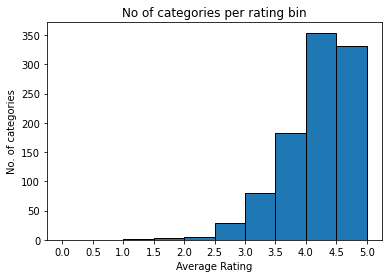

In [34]:
plt.hist(avg_category_rating.values(), edgecolor="black", bins=10, range= (0,5))
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel('Average Rating')
plt.ylabel('No. of categories')
plt.title('No of categories per rating bin')
plt.show()

##   Category wise review count

In [35]:
num_category_reviews = dict(sorted(num_category_reviews.items(), key=lambda x: x[1], reverse=True)[:100])
num_category_reviews

{'Restaurants': 206222,
 'Food': 95483,
 'Nightlife': 74593,
 'Bars': 70871,
 'American (New)': 51603,
 'Breakfast & Brunch': 48893,
 'Event Planning & Services': 44546,
 'Seafood': 40893,
 'Mexican': 37086,
 'American (Traditional)': 35704,
 'Sandwiches': 28483,
 'Hotels & Travel': 27178,
 'Shopping': 25744,
 'Coffee & Tea': 24541,
 'Cocktail Bars': 23446,
 'Beauty & Spas': 21251,
 'Burgers': 21063,
 'Salad': 19334,
 'Hotels': 18415,
 'Italian': 17923,
 'Arts & Entertainment': 17277,
 'Wine Bars': 17047,
 'Beer': 16734,
 'Wine & Spirits': 16734,
 'Desserts': 15816,
 'Pizza': 15172,
 'Bakeries': 14389,
 'Venues & Event Spaces': 14333,
 'Cafes': 14188,
 'Home Services': 13991,
 'Active Life': 12853,
 'Health & Medical': 12840,
 'Automotive': 12148,
 'Local Services': 11810,
 'Japanese': 10299,
 'Vegetarian': 10115,
 'Delis': 10071,
 'Specialty Food': 9836,
 'Caterers': 9030,
 'Juice Bars & Smoothies': 8621,
 'Wineries': 8273,
 'Asian Fusion': 8264,
 'Fast Food': 8243,
 'Steakhouses': 82

In [36]:
print(max(num_category_reviews.values()))
print(min(num_category_reviews.values()))

206222
2958


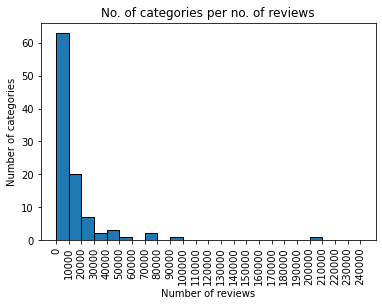

In [37]:
plt.hist(num_category_reviews.values(), edgecolor="black", bins=range(0, 250000, 10000))
plt.xticks(range(0, 250000, 10000), rotation = 90)
plt.xlabel('Number of reviews')
plt.ylabel('Number of categories')
plt.title('No. of categories per no. of reviews')
plt.show()

# Analysing Cities

In [38]:
df_business.city = df_business.city.str.lower()
df_business.city = df_business.city.str.strip()

In [39]:
df_business.city.unique()

array(['santa barbara', 'isla vista', 'goleta', 'carpinteria',
       'montecito', 'truckee', 'ventura', 'summerland', 'port hueneme',
       'west hill', 'santa ynez', 'sparks', 'kings beach',
       'mission canyon', 'los angeles', 'tampa', 'oxnard', 'cerritos',
       'eagle', 'reno', 'meridian', 'santa clara', 'valencia',
       'real goleta', 'santa barbara,', 'spring hill', 'aliso viejo',
       'santa barbara ap', 'south lake tahoe',
       'santa barbara & ventura counties', 'santa barbra', 'costa mesa',
       'santa  barbara', 'salinas', 'santa maria'], dtype=object)

In [40]:
df_business.city = df_business.city.replace('santa  barbara', 'santa barbara')
df_business.city = df_business.city.replace('santa barbara,', 'santa barbara')
df_business.city = df_business.city.replace('santa barbra', 'santa barbara')
df_business.city = df_business.city.replace('santa barbara ap', 'santa barbara')
df_business.city = df_business.city.replace('santa barbara & ventura counties', 'santa barbara')

In [41]:
df_business.city.unique()

array(['santa barbara', 'isla vista', 'goleta', 'carpinteria',
       'montecito', 'truckee', 'ventura', 'summerland', 'port hueneme',
       'west hill', 'santa ynez', 'sparks', 'kings beach',
       'mission canyon', 'los angeles', 'tampa', 'oxnard', 'cerritos',
       'eagle', 'reno', 'meridian', 'santa clara', 'valencia',
       'real goleta', 'spring hill', 'aliso viejo', 'south lake tahoe',
       'costa mesa', 'salinas', 'santa maria'], dtype=object)

In [42]:
cities = df_business.city.unique().tolist()
print(cities)

['santa barbara', 'isla vista', 'goleta', 'carpinteria', 'montecito', 'truckee', 'ventura', 'summerland', 'port hueneme', 'west hill', 'santa ynez', 'sparks', 'kings beach', 'mission canyon', 'los angeles', 'tampa', 'oxnard', 'cerritos', 'eagle', 'reno', 'meridian', 'santa clara', 'valencia', 'real goleta', 'spring hill', 'aliso viejo', 'south lake tahoe', 'costa mesa', 'salinas', 'santa maria']


In [43]:
city_wise_business = defaultdict(int)
city_wise_rating = defaultdict(int)
city_wise_numreviews = defaultdict(int)

In [44]:
for idx, row in df_business.iterrows():
  city_wise_business[row['city']] += 1
  city_wise_rating[row['city']] += row['stars']
  city_wise_numreviews[row['city']] += row['review_count']

In [45]:
for key, value in city_wise_rating.items():
  city_wise_rating[key] /= city_wise_business[key]

In [46]:
# for key, value in city_wise_numreviews.items():
#   city_wise_numreviews[key] /= city_wise_business[key]

In [47]:
print(dict(list(city_wise_business.items())[0: 5]))

{'santa barbara': 3842, 'isla vista': 94, 'goleta': 798, 'carpinteria': 299, 'montecito': 93}


In [48]:
print(dict(list(city_wise_rating.items())[0: 5]))

{'santa barbara': 4.052316501821967, 'isla vista': 3.50531914893617, 'goleta': 3.7493734335839597, 'carpinteria': 4.0200668896321075, 'montecito': 4.155913978494624}


In [49]:
print(dict(list(city_wise_numreviews.items())[0: 5]))

{'santa barbara': 263216, 'isla vista': 7386, 'goleta': 44126, 'carpinteria': 16905, 'montecito': 4886}


## City wise business count

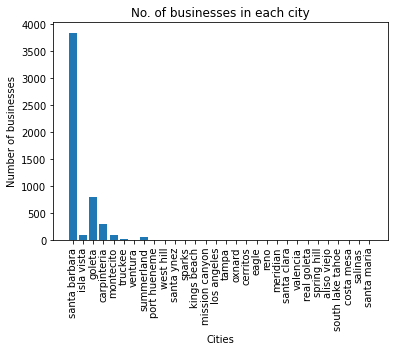

In [50]:
plt.bar(city_wise_business.keys(), city_wise_business.values())
plt.xticks(rotation = 90)
plt.xlabel('Cities')
plt.ylabel('Number of businesses')
plt.title('No. of businesses in each city')
plt.show()

##   City wise average rating

In [51]:
dict(sorted(city_wise_rating.items(), key=lambda x: x[1], reverse=True)[:100])

{'west hill': 5.0,
 'santa ynez': 5.0,
 'sparks': 5.0,
 'kings beach': 5.0,
 'los angeles': 5.0,
 'tampa': 5.0,
 'reno': 5.0,
 'meridian': 5.0,
 'aliso viejo': 5.0,
 'south lake tahoe': 5.0,
 'santa maria': 5.0,
 'truckee': 4.636363636363637,
 'mission canyon': 4.5,
 'oxnard': 4.5,
 'montecito': 4.155913978494624,
 'santa barbara': 4.052316501821967,
 'carpinteria': 4.0200668896321075,
 'summerland': 4.012195121951219,
 'eagle': 4.0,
 'goleta': 3.7493734335839597,
 'isla vista': 3.50531914893617,
 'valencia': 3.5,
 'costa mesa': 3.5,
 'salinas': 3.5,
 'cerritos': 3.0,
 'port hueneme': 2.5,
 'santa clara': 2.0,
 'real goleta': 2.0,
 'ventura': 1.5,
 'spring hill': 1.0}

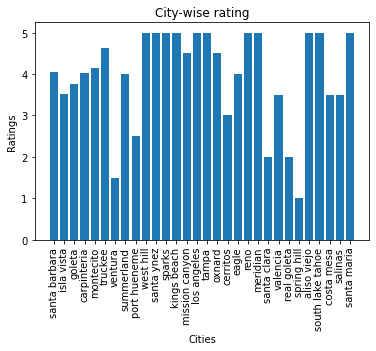

In [52]:
plt.bar(city_wise_rating.keys(), city_wise_rating.values())
plt.xticks(rotation = 90)
plt.xlabel('Cities')
plt.ylabel('Ratings')
plt.title('City-wise rating')
plt.show()

##   Category wise review count

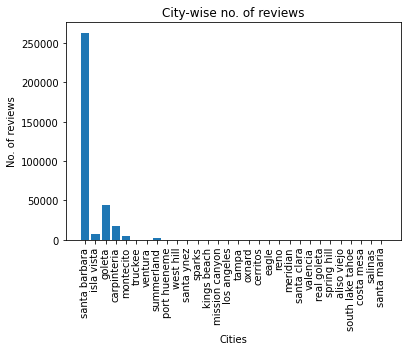

In [53]:
plt.bar(city_wise_numreviews.keys(), city_wise_numreviews.values())
plt.xticks(rotation = 90)
plt.xlabel('Cities')
plt.ylabel('No. of reviews')
plt.title('City-wise no. of reviews')
plt.show()

# Analysing review count vs rating

In [54]:
df_business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",santa barbara,CA,93101.0,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,santa barbara,CA,93101.0,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",santa barbara,CA,93101.0,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,santa barbara,CA,93103.0,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,santa barbara,CA,93101.0,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5198,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,santa barbara,CA,93105.0,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': ""{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ..."
5199,8BUr8GviR2o_b-brO21wwQ,Kyle's Isla Vista,900 Embarcadero Del Mar,isla vista,CA,93117.0,34.412966,-119.856886,2.5,12,1,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",NaN
5200,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",santa barbara,CA,93101.0,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
5201,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,santa barbara,CA,93105.0,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': ""u'average'"", 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'..."


In [55]:
# num of reviews per star
review_ct_per_star = defaultdict(float)
num_records_star = defaultdict(float)

In [56]:
for idx, row in df_business.iterrows():
  num_records_star[row['stars']] += 1
  review_ct_per_star[row['stars']] += row['review_count']

In [57]:
num_records_star

defaultdict(float,
            {5.0: 1208.0,
             3.0: 435.0,
             4.0: 1080.0,
             4.5: 1223.0,
             2.5: 297.0,
             3.5: 683.0,
             2.0: 182.0,
             1.5: 69.0,
             1.0: 26.0})

In [58]:
review_ct_per_star

defaultdict(float,
            {5.0: 26565.0,
             3.0: 21815.0,
             4.0: 118773.0,
             4.5: 94942.0,
             2.5: 12140.0,
             3.5: 57607.0,
             2.0: 5877.0,
             1.5: 1578.0,
             1.0: 340.0})

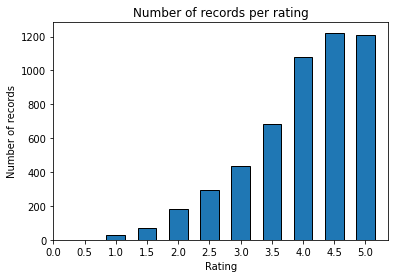

In [59]:
plt.bar(num_records_star.keys(), num_records_star.values(), edgecolor='black', width=0.3)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel('Rating')
plt.ylabel('Number of records')
plt.title('Number of records per rating')
plt.show()

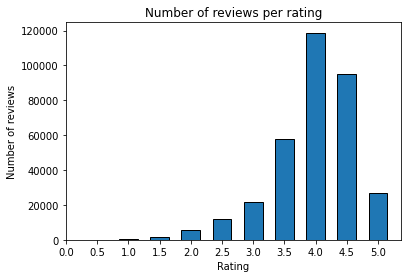

In [60]:
plt.bar(review_ct_per_star.keys(), review_ct_per_star.values(), edgecolor='black', width=0.3)
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per rating')
plt.show()

# Analysing Duration vs rating/review count
duration open in whole week or avg opening duration?

In [61]:
df_business['hours']

0                                                     NaN
1       {'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...
2       {'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...
3       {'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...
4       {'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...
                              ...                        
5198    {'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ...
5199                                                  NaN
5200    {'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...
5201    {'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...
5202    {'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...
Name: hours, Length: 5203, dtype: object

# Feature Engineering

- Category - one hot encoded
- Average stars (user)
- Stars - business
- Duration of business hours - duration open in whole week or avg opening duration?
- Yelping since
- Elite in current year (binary)/prev year


## Category

In [62]:
categories

{'Restaurants': 1161,
 'Shopping': 936,
 'Food': 835,
 'Home Services': 638,
 'Health & Medical': 592,
 'Event Planning & Services': 550,
 'Local Services': 510,
 'Beauty & Spas': 510,
 'Active Life': 369,
 'Automotive': 326,
 'Nightlife': 317,
 'Hotels & Travel': 311,
 'Bars': 281,
 'Arts & Entertainment': 254,
 'Professional Services': 254,
 'Fashion': 236,
 'Doctors': 235,
 'Home & Garden': 220,
 'American (New)': 202,
 'Mexican': 189,
 'Coffee & Tea': 184,
 'Hair Salons': 178,
 'Sandwiches': 174,
 'Breakfast & Brunch': 170,
 'Real Estate': 169,
 'Auto Repair': 166,
 'Fitness & Instruction': 163}

In [63]:
df_business_updated = df_business.copy()

In [64]:
for categ in categories:
  df_business_updated[categ] = 0

In [65]:
df_business_updated.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Home & Garden,American (New),Mexican,Coffee & Tea,Hair Salons,Sandwiches,Breakfast & Brunch,Real Estate,Auto Repair,Fitness & Instruction
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",santa barbara,CA,93101.0,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,0,0,0,0
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,santa barbara,CA,93101.0,34.420209,-119.700460,3.0,24,...,0,0,0,0,0,0,0,0,0,0
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",santa barbara,CA,93101.0,34.414445,-119.690672,4.0,389,...,0,0,0,0,0,0,0,0,0,0
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,santa barbara,CA,93103.0,34.419620,-119.677032,4.5,32,...,0,0,0,0,0,0,0,0,0,0
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,santa barbara,CA,93101.0,34.420334,-119.710749,5.0,17,...,0,0,0,0,0,0,0,0,0,0


In [66]:
len(categories)

27

In [67]:
for idx, row in df_business_updated.iterrows():
  # print(row)
  ll = row['categories']
  ll = str(ll)
  if ll and ll!='nan':
    categs = ll.split(',')
    for categ in categs:
      categ = categ.strip()
      if categ in categories:
        df_business_updated.at[idx, categ] = 1

In [68]:
df_business_updated

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Home & Garden,American (New),Mexican,Coffee & Tea,Hair Salons,Sandwiches,Breakfast & Brunch,Real Estate,Auto Repair,Fitness & Instruction
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",santa barbara,CA,93101.0,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,0,0,0,0
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,santa barbara,CA,93101.0,34.420209,-119.700460,3.0,24,...,0,0,0,0,0,0,0,0,0,0
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",santa barbara,CA,93101.0,34.414445,-119.690672,4.0,389,...,0,0,0,1,0,1,1,0,0,0
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,santa barbara,CA,93103.0,34.419620,-119.677032,4.5,32,...,0,0,0,0,0,0,0,0,0,0
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,santa barbara,CA,93101.0,34.420334,-119.710749,5.0,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5198,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,santa barbara,CA,93105.0,34.429154,-119.717222,5.0,19,...,0,0,0,0,0,0,0,0,0,0
5199,8BUr8GviR2o_b-brO21wwQ,Kyle's Isla Vista,900 Embarcadero Del Mar,isla vista,CA,93117.0,34.412966,-119.856886,2.5,12,...,0,0,0,0,0,0,0,0,0,0
5200,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",santa barbara,CA,93101.0,34.428995,-119.712718,4.5,15,...,0,0,0,0,0,0,0,0,0,0
5201,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,santa barbara,CA,93105.0,34.440689,-119.739681,4.0,299,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df_business_updated.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'Restaurants', 'Shopping', 'Food',
       'Home Services', 'Health & Medical', 'Event Planning & Services',
       'Local Services', 'Beauty & Spas', 'Active Life', 'Automotive',
       'Nightlife', 'Hotels & Travel', 'Bars', 'Arts & Entertainment',
       'Professional Services', 'Fashion', 'Doctors', 'Home & Garden',
       'American (New)', 'Mexican', 'Coffee & Tea', 'Hair Salons',
       'Sandwiches', 'Breakfast & Brunch', 'Real Estate', 'Auto Repair',
       'Fitness & Instruction'],
      dtype='object')

In [70]:
df_business_updated['Restaurants'].value_counts()

0    4042
1    1161
Name: Restaurants, dtype: int64

In [71]:
# df_business_updated.loc('IDtLPgUrqorrpqSLdfMhZQ')
(df_business_updated.loc[df_business_updated['business_id'] == 'IDtLPgUrqorrpqSLdfMhZQ'])[['Restaurants', 'Shopping', 'Food',
       'Home Services', 'Health & Medical', 'Event Planning & Services',
       'Local Services', 'Beauty & Spas', 'Active Life', 'Automotive',
       'Nightlife', 'Hotels & Travel', 'Bars', 'Arts & Entertainment',
       'Professional Services', 'Fashion', 'Doctors', 'Home & Garden',
       'American (New)', 'Mexican', 'Coffee & Tea', 'Hair Salons',
       'Sandwiches', 'Breakfast & Brunch', 'Real Estate', 'Auto Repair',
       'Fitness & Instruction']]

,Restaurants,Shopping,Food,Home Services,Health & Medical,Event Planning & Services,Local Services,Beauty & Spas,Active Life,Automotive,...,Home & Garden,American (New),Mexican,Coffee & Tea,Hair Salons,Sandwiches,Breakfast & Brunch,Real Estate,Auto Repair,Fitness & Instruction
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


In [82]:
business_to_categ = defaultdict(list)
for row in df_business_updated.iterrows():
  bid = row[1]['business_id']
  ohe_values = (df_business_updated.loc[df_business_updated['business_id'] == bid])[['Restaurants', 'Shopping', 'Food',
       'Home Services', 'Health & Medical', 'Event Planning & Services',
       'Local Services', 'Beauty & Spas', 'Active Life', 'Automotive',
       'Nightlife', 'Hotels & Travel', 'Bars', 'Arts & Entertainment',
       'Professional Services', 'Fashion', 'Doctors', 'Home & Garden',
       'American (New)', 'Mexican', 'Coffee & Tea', 'Hair Salons',
       'Sandwiches', 'Breakfast & Brunch', 'Real Estate', 'Auto Repair',
       'Fitness & Instruction']]
  business_to_categ[bid] = list(ohe_values.iloc[0])

In [85]:
def get_category(business_id):
  return business_to_categ[business_id]

In [86]:
get_category('IDtLPgUrqorrpqSLdfMhZQ')

[1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0]

## Average category rating


In [87]:
avg_category_rating['Coffee & Tea']

3.7690217391304346

In [88]:
avg_category_rating['Fitness & Instruction']

4.539877300613497

In [89]:
for categ in categories:
  df_business_updated[categ+'avg_rating'] = 0.00

In [90]:
df_business_updated.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Home & Gardenavg_rating,American (New)avg_rating,Mexicanavg_rating,Coffee & Teaavg_rating,Hair Salonsavg_rating,Sandwichesavg_rating,Breakfast & Brunchavg_rating,Real Estateavg_rating,Auto Repairavg_rating,Fitness & Instructionavg_rating
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",santa barbara,CA,93101.0,34.426679,-119.711197,5.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,santa barbara,CA,93101.0,34.420209,-119.700460,3.0,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",santa barbara,CA,93101.0,34.414445,-119.690672,4.0,389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,santa barbara,CA,93103.0,34.419620,-119.677032,4.5,32,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,santa barbara,CA,93101.0,34.420334,-119.710749,5.0,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
for idx, row in df_business_updated.iterrows():
  for categ in categories:
    if df_business_updated.at[idx, categ] == 1:
      df_business_updated.at[idx, categ+'avg_rating'] = avg_category_rating[categ]

In [92]:
df_business_updated

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Home & Gardenavg_rating,American (New)avg_rating,Mexicanavg_rating,Coffee & Teaavg_rating,Hair Salonsavg_rating,Sandwichesavg_rating,Breakfast & Brunchavg_rating,Real Estateavg_rating,Auto Repairavg_rating,Fitness & Instructionavg_rating
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",santa barbara,CA,93101.0,34.426679,-119.711197,5.0,7,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
1,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,santa barbara,CA,93101.0,34.420209,-119.700460,3.0,24,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
2,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",santa barbara,CA,93101.0,34.414445,-119.690672,4.0,389,...,0.0,0.0,0.0,3.769022,0.0,3.755747,3.788235,0.0,0.0,0.000000
3,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,santa barbara,CA,93103.0,34.419620,-119.677032,4.5,32,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
4,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,NaN,santa barbara,CA,93101.0,34.420334,-119.710749,5.0,17,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5198,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,santa barbara,CA,93105.0,34.429154,-119.717222,5.0,19,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
5199,8BUr8GviR2o_b-brO21wwQ,Kyle's Isla Vista,900 Embarcadero Del Mar,isla vista,CA,93117.0,34.412966,-119.856886,2.5,12,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
5200,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",santa barbara,CA,93101.0,34.428995,-119.712718,4.5,15,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
5201,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,santa barbara,CA,93105.0,34.440689,-119.739681,4.0,299,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [ ]:
def get_avg_category_ratings(business_id):
    ohe_values = (df_business_updated.loc[df_business_updated['business_id'] == business_id])[['Restaurantsavg_rating', 'Shoppingavg_rating',
       'Foodavg_rating', 'Home Servicesavg_rating',
       'Health & Medicalavg_rating', 'Event Planning & Servicesavg_rating',
       'Local Servicesavg_rating', 'Beauty & Spasavg_rating',
       'Active Lifeavg_rating', 'Automotiveavg_rating', 'Nightlifeavg_rating',
       'Hotels & Travelavg_rating', 'Barsavg_rating',
       'Arts & Entertainmentavg_rating', 'Professional Servicesavg_rating',
       'Fashionavg_rating', 'Doctorsavg_rating', 'Home & Gardenavg_rating',
       'American (New)avg_rating', 'Mexicanavg_rating',
       'Coffee & Teaavg_rating', 'Hair Salonsavg_rating',
       'Sandwichesavg_rating', 'Breakfast & Brunchavg_rating',
       'Real Estateavg_rating', 'Auto Repairavg_rating',
       'Fitness & Instructionavg_rating']]

    return list(ohe_values.iloc[0])

In [93]:
business_to_avgrating = defaultdict(list)
for row in df_business_updated.iterrows():
  bid = row[1]['business_id']
  ohe_values = (df_business_updated.loc[df_business_updated['business_id'] == bid])[['Restaurantsavg_rating', 'Shoppingavg_rating',
       'Foodavg_rating', 'Home Servicesavg_rating',
       'Health & Medicalavg_rating', 'Event Planning & Servicesavg_rating',
       'Local Servicesavg_rating', 'Beauty & Spasavg_rating',
       'Active Lifeavg_rating', 'Automotiveavg_rating', 'Nightlifeavg_rating',
       'Hotels & Travelavg_rating', 'Barsavg_rating',
       'Arts & Entertainmentavg_rating', 'Professional Servicesavg_rating',
       'Fashionavg_rating', 'Doctorsavg_rating', 'Home & Gardenavg_rating',
       'American (New)avg_rating', 'Mexicanavg_rating',
       'Coffee & Teaavg_rating', 'Hair Salonsavg_rating',
       'Sandwichesavg_rating', 'Breakfast & Brunchavg_rating',
       'Real Estateavg_rating', 'Auto Repairavg_rating',
       'Fitness & Instructionavg_rating']]
  business_to_avgrating[bid] = list(ohe_values.iloc[0])

In [94]:
def get_avg_category_ratings(business_id):
  return business_to_avgrating[business_id]

In [95]:
get_avg_category_ratings('IDtLPgUrqorrpqSLdfMhZQ')

[3.7627045650301465,
 0.0,
 3.929940119760479,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.7690217391304346,
 0.0,
 3.7557471264367814,
 3.788235294117647,
 0.0,
 0.0,
 0.0]

## Review text

In [ ]:
df_reviews['text']

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
new_stopwords = set(["all", "due", "to", "on", "daily", "this", "went"])
stop_words = stop_words.union(new_stopwords)

In [ ]:
for review_text in df_reviews['text']:
  word_tokens = word_tokenize(review_text)
  filtered_sentence = [w.lower() for w in word_tokens if w.lower() not in stop_words and len(w)>=3]
  filtered_sentence2 = []
  for w in filtered_sentence:
      if w not in stop_words and w not in string.punctuation:
          filtered_sentence2.append(w.lower())
    
  print(filtered_sentence2)